# Scrubbing the data

Datasets in the real world are never perfect. There will always be missing values and outliers that skew the dataset, affecting the accuracy of our predictive model. That’s why it is always a good idea to clean up the data before you start building your model.

Clean data to formats that better for work and vizualisation. Check all columns for placeholders, duplicates, or other atypical values:
1. Placeholders and Changing datatypes - check column `'date'`, `'sqft_basement'` 
2. Duplicate - check dataset for duplicate by `'id'`
3. Null/NaN - check missing values 
4. Atypical values - check values max, min, average and peak values
5. Remove unnecessary columns 

In [319]:
# import all libraries for work 
import os # for work with path/dir
import pandas as pd
import numpy as np

# visualizations
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
from scipy.stats import norm
import missingno as msno

In [320]:
# read information from csv file
pd.set_option('display.max_columns', 21)
data = pd.read_csv("kc_house_data.csv") 
data.head(5)

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         NaN   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   
2     10000     1.0         0.0   0.0          3      6         770   
3      5000     1.0         0.0   0.0          5      7        1050   
4      8080     1.0         0.0   0.0          3      8        1680   

  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0           0.0      1955           0.0    98178  47.5112 -122.257   
1         400.0      1951        1991.0    98125  47.7210 -122.319   
2           0.0      1933           NaN    98028  47.7379 -122.233   
3         910.0      1965           0.0    98136  47.5208 -122.393   
4           0.0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

**How many rows in original file?**

In [321]:
# save how much columns and rows we have in the original dataset
original_shape = data.shape
original_shape 

(21597, 21)

**Check data types in DataFrame**

In [322]:
# check data types in dataset
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [323]:
# sort data by id for better understanding 
data.sort_values("id", axis = 0, ascending = True, inplace = True, na_position ='last') 
data.head(3)

id       date     price  bedrooms  bathrooms  sqft_living  \
2495  1000102  4/22/2015  300000.0         6       3.00         2400   
2494  1000102  9/16/2014  280000.0         6       3.00         2400   
6729  1200019   5/8/2014  647500.0         4       1.75         2060   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
2495      9373     2.0         0.0   0.0          3      7        2400   
2494      9373     2.0         NaN   0.0          3      7        2400   
6729     26036     1.0         NaN   0.0          4      8        1160   

     sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
2495           0.0      1991           0.0    98002  47.3262 -122.214   
2494           0.0      1991           0.0    98002  47.3262 -122.214   
6729         900.0      1947           0.0    98166  47.4444 -122.351   

      sqft_living15  sqft_lot15  
2495           2060        7316  
2494           2060        7316  
6729           2590       21891

# 1. Changing datatypes
## Replace date type from object to datetime for column date

In [324]:
data['date'] = pd.to_datetime(data['date'])
data.head(3)

id       date     price  bedrooms  bathrooms  sqft_living  \
2495  1000102 2015-04-22  300000.0         6       3.00         2400   
2494  1000102 2014-09-16  280000.0         6       3.00         2400   
6729  1200019 2014-05-08  647500.0         4       1.75         2060   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
2495      9373     2.0         0.0   0.0          3      7        2400   
2494      9373     2.0         NaN   0.0          3      7        2400   
6729     26036     1.0         NaN   0.0          4      8        1160   

     sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
2495           0.0      1991           0.0    98002  47.3262 -122.214   
2494           0.0      1991           0.0    98002  47.3262 -122.214   
6729         900.0      1947           0.0    98166  47.4444 -122.351   

      sqft_living15  sqft_lot15  
2495           2060        7316  
2494           2060        7316  
6729           2590       21891

Now we always can work with years, month and day of week.

In [325]:
data['date'] = pd.to_datetime(data['date'])
data['year'],data['month'],data['day'] = data['date'].dt.year, data['date'].dt.month, data['date'].dt.dayofweek

# use drop
data.drop('date', axis=1, inplace=True)
data.head(2)

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
2495  1000102  300000.0         6        3.0         2400      9373     2.0   
2494  1000102  280000.0         6        3.0         2400      9373     2.0   

      waterfront  view  condition  ...  yr_built  yr_renovated zipcode  \
2495         0.0   0.0          3  ...      1991           0.0   98002   
2494         NaN   0.0          3  ...      1991           0.0   98002   

          lat     long  sqft_living15  sqft_lot15  year  month  day  
2495  47.3262 -122.214           2060        7316  2015      4    2  
2494  47.3262 -122.214           2060        7316  2014      9    1  

[2 rows x 23 columns]

## Replace date type from object to int for column sqft_basement

In [165]:
data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
20.0          1
1798.0        1
1880.0        1
1481.0        1
2580.0        1
Name: sqft_basement, Length: 304, dtype: int64

Over half of the `'sqft_basement'` column is `'0.0'`, dataset has some "?" placeholders. Let's fill column with  information. Calculate column that is equal to sqft_living (total square feet) - sqft_above  (square feet excluding the basement). This takes care of our missing values and feels more accurate.

In [227]:
data['sqft_basement'] = data['sqft_living'] - data['sqft_above']

In [167]:
data['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [168]:
sns.distplot(data['sqft_basement']).set_title('Square Footage Basement Distribution')

Text(0.5, 1.0, 'Square Footage Basement Distribution')

# 2. Do we have duplicates in our dataset?
We have only one field which can be uniq key for dataset - it is `"id"`

In [169]:
# how many duplicates 
data.duplicated(subset='id').sum()

177

In [170]:
# check duplicate dataset
data.loc[data['id'].isin(list(data[(data.duplicated(subset='id')==True)].sort_values("id")['id']))]

id       date     price  bedrooms  bathrooms  sqft_living  \
2495      1000102 2015-04-22  300000.0         6       3.00         2400   
2494      1000102 2014-09-16  280000.0         6       3.00         2400   
16800     7200179 2014-10-16  150000.0         2       1.00          840   
16801     7200179 2015-04-24  175000.0         2       1.00          840   
11422   109200390 2014-10-20  250000.0         3       1.75         1480   
...           ...        ...       ...       ...        ...          ...   
6339   9828200460 2014-06-27  260000.0         2       1.00          700   
15186  9834200305 2015-02-10  615000.0         3       1.00         1790   
15185  9834200305 2014-07-16  350000.0         3       1.00         1790   
1084   9834200885 2014-07-17  360000.0         4       2.50         2080   
1085   9834200885 2015-04-20  550000.0         4       2.50         2080   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
2495       9373     2.0         0.0   0.0          3      7        2400   
2494       9373     2.0         NaN   0.0          3      7        2400   
16800     12750     1.0         0.0   0.0          3      6         840   
16801     12750     1.0         0.0   0.0          3      6         840   
11422      3900     1.0         0.0   0.0          4      7        1480   
...         ...     ...         ...   ...        ...    ...         ...   
6339       4800     1.0         0.0   0.0          3      7         700   
15186      3876     1.5         0.0   0.0          5      7        1090   
15185      3876     1.5         0.0   0.0          5      7        1090   
1084       4080     1.0         0.0   0.0          5      7        1040   
1085       4080     1.0         0.0   0.0          5      7        1040   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
2495               0      1991           0.0    98002  47.3262 -122.214   
2494               0      1991           0.0    98002  47.3262 -122.214   
16800              0      1925           0.0    98055  47.4840 -122.211   
16801              0      1925           NaN    98055  47.4840 -122.211   
11422              0      1980           0.0    98023  47.2977 -122.367   
...              ...       ...           ...      ...      ...      ...   
6339               0      1922           0.0    98122  47.6147 -122.300   
15186            700      1904           0.0    98144  47.5750 -122.288   
15185            700      1904           0.0    98144  47.5750 -122.288   
1084            1040      1962           0.0    98144  47.5720 -122.290   
1085            1040      1962           0.0    98144  47.5720 -122.290   

       sqft_living15  sqft_lot15  
2495            2060        7316  
2494            2060        7316  
16800           1480        6969  
16801           1480        6969  
11422           1830        6956  
...              ...         ...  
6339            1440        4800  
15186           1360        4080  
15185           1360        4080  
1084            1340        4080  
1085            1340        4080  

[353 rows x 21 columns]

### It's look like some houses were sold twice in 2014-2015

# 3. Check for missing values in dataset:

In [171]:
# one more check for Nan/Null
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

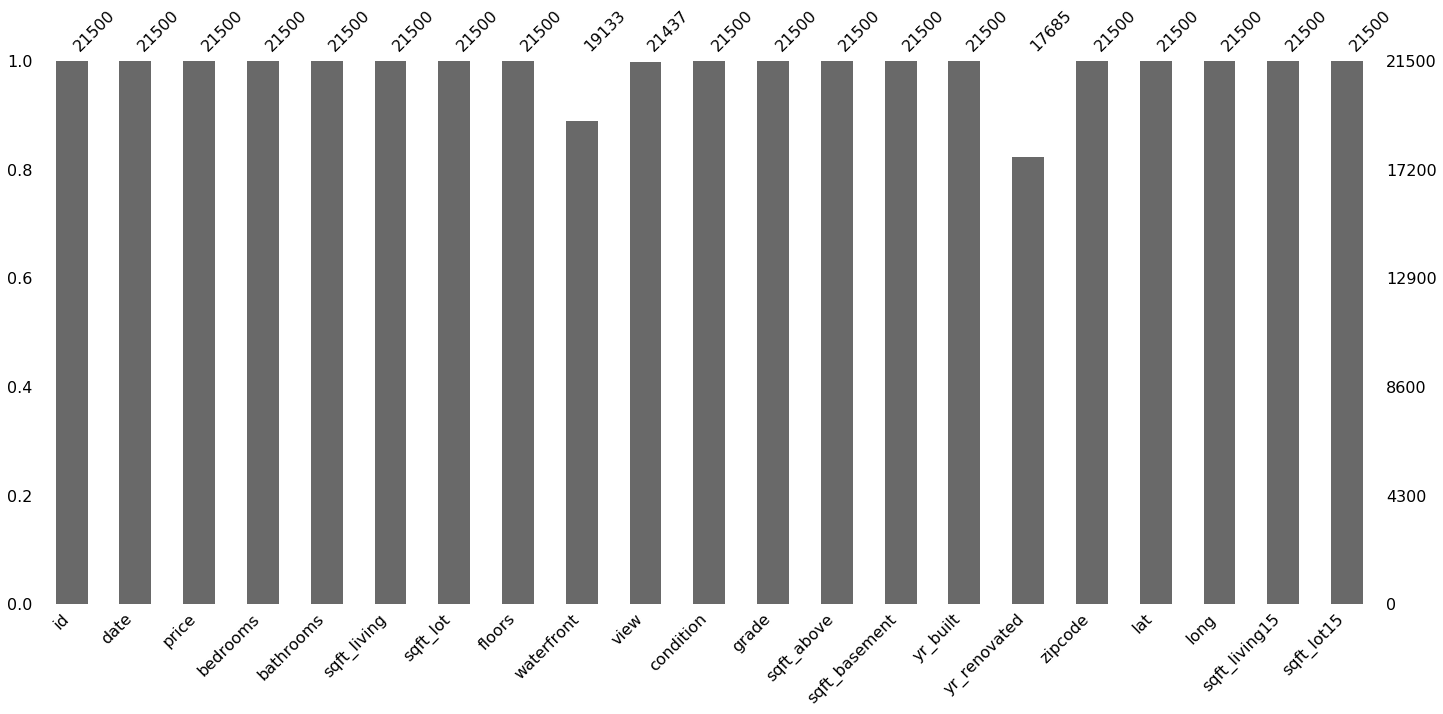

In [172]:
# checking if any value is NaN 
msno.bar(data.sample(21500))

### How we can see here tree columns `'waterfront'`, `'view'`, `'yr_renovated'` with null/Nan values. 

In [173]:
percent_waterfront  = round((data['waterfront'].isna().sum() / len(data))*100, 1)
percent_view = round((data['view'].isna().sum() / len(data))*100, 1)
percent_yr_renovated  = round((data['yr_renovated'].isna().sum() / len(data))*100, 1)
print (percent_waterfront, percent_view,percent_yr_renovated)

11.0 0.3 17.8


* `'waterfront'` has 11% null values
* `'view'` has 0.3% null values
* `'yr_renovated'` has around 18% null values

### Waterfront

In [174]:
# what we have in water front:
data[data['waterfront'].isnull()].head(3)

id       date     price  bedrooms  bathrooms  sqft_living  \
2494   1000102 2014-09-16  280000.0         6       3.00         2400   
6729   1200019 2014-05-08  647500.0         4       1.75         2060   
18506  3600072 2015-03-30  680000.0         4       2.75         2220   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
2494       9373     2.0         NaN   0.0          3      7        2400   
6729      26036     1.0         NaN   0.0          4      8        1160   
18506      5310     1.0         NaN   0.0          5      7        1170   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
2494               0      1991           0.0    98002  47.3262 -122.214   
6729             900      1947           0.0    98166  47.4444 -122.351   
18506           1050      1951           NaN    98144  47.5801 -122.294   

       sqft_living15  sqft_lot15  
2494            2060        7316  
6729            2590       21891  
18506           1540        4200

In [175]:
water = data[data['waterfront'].isnull()]
fig = px.scatter_mapbox(water, lat="lat", lon="long", color="price", hover_name="price", hover_data=["bedrooms", "bathrooms"],
                        color_discrete_sequence=["green"], size_max=15, zoom=8, width=900, height=600, 
                        title =  '<b>Is they have waterfront?</b>')
fig.update_layout(mapbox_style="open-street-map")
fig.show(config={'scrollZoom': False})
water.shape

(2376, 21)

There were a 2376 missing values. This is a categorical variable with 0 not being waterfront and 1 being waterfront. I want to save this column, I belive it's can be usefull in our analyze. I just replaced the Null values with 0s

In [228]:
data.waterfront = data['waterfront'].fillna(0).astype('int64')   
data['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

Do the same for the rest of the columns with lost data

### View

In [229]:
data['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [230]:
data.view = data['view'].fillna(0).astype('int64')   
data['view'].value_counts()

0    19485
2      957
3      508
1      330
4      317
Name: view, dtype: int64

### Year renovated

In [179]:
data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1953.0        1
1948.0        1
1934.0        1
1976.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64

16867 houses have zero in column `'yr_renovated'`. Replaceing each missing value with zeros will not significantly alter the outcome.

In [231]:
data.yr_renovated = data['yr_renovated'].fillna(0).astype('int64')   
data['yr_renovated'].value_counts()

0       20853
2014       73
2003       31
2013       31
2007       30
        ...  
1976        1
1953        1
1951        1
1946        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [232]:
t = data[data['yr_renovated']>0]
t[t['yr_renovated']-t['yr_built']<0]

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

We don't have houses where renovated made before building.

In [244]:
# one more check for Nan/Null
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# 4. Atypical values

I want to find atypical values in this data set. Better way for it on this position - create a historgams for dataset.

In [234]:
data_subset1 = data[['floors', 'waterfront', 'view', 'condition','zipcode', 'grade']]

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for index, ax in enumerate(axs.flatten()):   
        column = data_subset1.columns[index]
        ax.hist(data_subset1[column], bins=30, color = 'Green')
        ax.set_title(column)
plt.show()

In [235]:
data_subset2 = data[['bathrooms','bedrooms']]

fig, axs = plt.subplots(1, 2, figsize=(15, 4))

for index, ax in enumerate(axs.flatten()):   
        column = data_subset2.columns[index]
        ax.hist(data_subset2[column], bins=30, color = 'Green')
        ax.set_title(column)
plt.show()

In [279]:
data_subset3 = data[['sqft_living','sqft_above','sqft_basement','sqft_living15','sqft_lot15', 'sqft_lot']]

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for index, ax in enumerate(axs.flatten()):   
        column = data_subset3.columns[index]
        ax.hist(data_subset3[column], bins=30, color = 'Green')
        ax.set_title(column)
plt.show()

Here we can see a few important characteristics:
1. Floors, waterfront, view, condition, zipcode, and grade - look like a categorical data
2. Bathrooms and bedrooms would also be categorical, but have some outlier
3. Price, bedrooms, sqft_living, sqft_above, sqft_living15, view, long, sqft_basement have heavily skewed distribution
4. Bathroom and grade have normally distributed

### Remove outlier from columns `bathrooms` and `bedrooms`
There are very few houses with more than 6 bedrooms. I decide to remove this values, them will not bring anything meaningful to our analysis.

In [269]:
# Bathrooms - remove homes with more than 5 bathrooms.
data = data.loc[data['bathrooms']<=5]

# Bedrooms - remove homes with more than 6 bedrooms. 
data = data[data['bedrooms'] <= 6]

In [272]:
sns.distplot(data['bedrooms'], color='green', label='Count bedrooms',fit=norm, kde=False)
plt.title('Bedrooms Distribution vs. norm')
plt.legend()
plt.show()

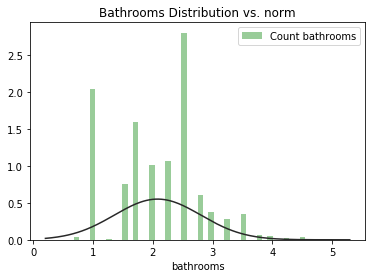

In [273]:
sns.distplot(data['bathrooms'], color='green', label='Count bathrooms',fit=norm, kde=False)
plt.title('Bathrooms Distribution vs. norm')
plt.legend()
plt.show()

### All columns with square footage area have huge outliers. Let's try to drop extreme values.

In [237]:
list_of_sqft = ['sqft_living','sqft_above','sqft_basement','sqft_living15','sqft_lot15', 'sqft_lot']
for col in list_of_sqft:
    print(col, '\n', data[col].describe(),'\n\n')

sqft_living 
 count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64 


sqft_above 
 count    21597.000000
mean      1788.596842
std        827.759761
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64 


sqft_basement 
 count    21597.000000
mean       291.725008
std        442.667800
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64 


sqft_living15 
 count    21597.000000
mean      1986.620318
std        685.230472
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: sqft_living15, dtype: float64 


sqft_lot15 
 count     21597.000000
mean      12758.283512
std       27274.441950
min 

In [252]:
#Interquartile range
def iqr_outliers(data,column):
    #IQR = Third percentile - First percentile
    iqr = np.percentile(data[column],[75])[0]- np.percentile(data[column],[25])[0]
    # Top Outliers = Third percentile + 1.5 * IQR
    top = np.percentile(data[column],[75])[0]+iqr*1.5
    return top

In [280]:
#using this data remove outliers based on IQR
data_subset3 = data_subset3.loc[data_subset3['sqft_living']<= iqr_outliers(data_subset3,'sqft_living')]
data_subset3 = data_subset3.loc[data_subset3['sqft_above']<= iqr_outliers(data_subset3,'sqft_above')]
data_subset3 = data_subset3.loc[data_subset3['sqft_basement']<= iqr_outliers(data_subset3,'sqft_basement')]
data_subset3 = data_subset3.loc[data_subset3['sqft_living15']<= iqr_outliers(data_subset3,'sqft_living15')]
data_subset3 = data_subset3.loc[data_subset3['sqft_lot15']<= iqr_outliers(data_subset3,'sqft_lot15')]
data_subset3 = data_subset3.loc[data_subset3['sqft_lot']<= iqr_outliers(data_subset3,'sqft_lot')]
data_subset3.shape

(17328, 6)

In [281]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for index, ax in enumerate(axs.flatten()):   
        column = data_subset3.columns[index]
        ax.hist(data_subset3[column], bins=30, color = 'Green')
        ax.set_title(column)
plt.show()

In [257]:
print(iqr_outliers(data_subset3,'sqft_living')) # ~5,000
print(iqr_outliers(data_subset3,'sqft_above'))# ~4,500
print(iqr_outliers(data_subset3,'sqft_basement'))# ~2,000
print(iqr_outliers(data_subset3,'sqft_living15'))# ~5,000
print(iqr_outliers(data_subset3,'sqft_lot15'))# ~100000
print(iqr_outliers(data_subset3,'sqft_lot'))# ~100000

4230.0
3740.0
1400.0
3665.0
17557.5
19152.5


In [282]:
data = data.loc[data['sqft_living']<= 4230]
data = data.loc[data['sqft_above']<= 3740]
data = data.loc[data['sqft_basement']<=1400]
data = data.loc[data['sqft_living15']<= 3665]
data = data.loc[data['sqft_lot15']<= 17557.5]
data = data.loc[data['sqft_lot']<= 19152.5]
data.shape

(18049, 21)

Text(0.5, 1.0, 'sqft_living Distribution')

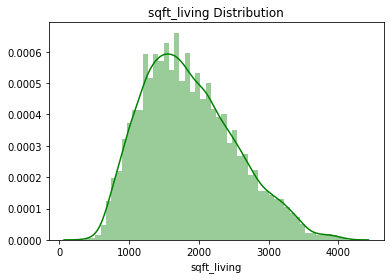

In [267]:
sns.distplot(data_subset3['sqft_living'], color='green').set_title('sqft_living Distribution')

***

### Grade

In [128]:
data['grade'].value_counts()

7     8795
8     5923
9     2478
6     1998
10    1003
11     253
5      231
4       27
12      25
3        1
Name: grade, dtype: int64

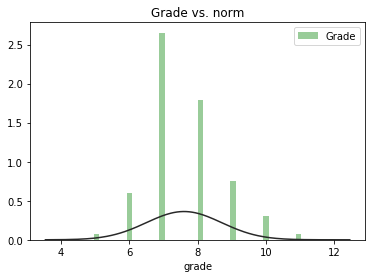

In [80]:
data = data[data['grade'] > 3]
sns.distplot(data['grade'], color='green', label='Grade',fit=norm, kde=False)
plt.title('Grade vs. norm')
plt.legend()
plt.show()

***

### Price

I decide to remove super expensive houses. Let's try keeping price within 3 standard deviations of the mean (so as not to eliminate too much data.

Text(0.5, 1.0, 'Price Distribution')

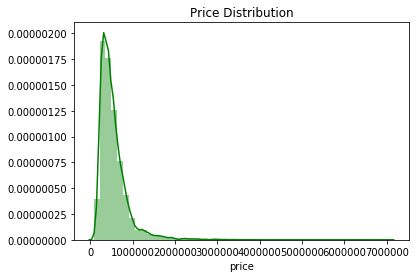

In [274]:
sns.distplot(data['price'],color='green').set_title('Price Distribution')

In [130]:
print('mean for price = ', data.price.mean())
print('standart deviation = ', data.price.std())
print('limit for price = ', data.price.mean()+3*data.price.std())

mean for price =  518882.19804176915
standart deviation =  308260.76954767527
limit for price =  1443664.506684795


In [81]:
data = data[data['price']<1443664.506684795]
data.shape

(20341, 21)

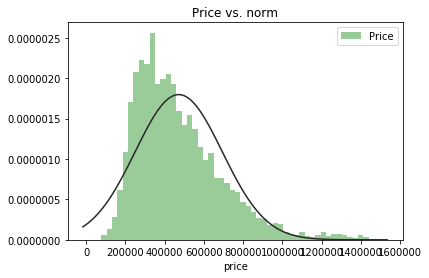

In [287]:
sns.distplot(data['price'], color='green', label='Price',fit=norm, kde=False)
plt.title('Price vs. norm')
plt.legend()
plt.show()

## Looks much better!!

# Drop some columns

**id:** Dropped column. This column is not nessesary in our research.

In [311]:
# use drop
data.drop('id', axis=1, inplace=True)
data.head(2)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   

   view  condition  grade  ...  yr_built  yr_renovated  zipcode      lat  \
0     0          3      7  ...      1955             0    98178  47.5112   
1     0          3      7  ...      1951          1991    98125  47.7210   

      long  sqft_living15  sqft_lot15  year  month  day  
0 -122.257           1340        5650  2014     10    0  
1 -122.319           1690        7639  2014     12    1  

[2 rows x 22 columns]

In [305]:
fig = px.scatter_mapbox(data, lat="lat", lon="long", color="price", hover_name="price", hover_data=["bedrooms", "bathrooms"],
                        color_discrete_sequence=["green"], size_max=15, zoom=8, width=900, height=600, 
                        title =  '<b>Map of area with clean data</b>')
fig.update_layout(mapbox_style="open-street-map")
fig.show(config={'scrollZoom': False})

In [312]:
 # cutting off the Eastern suburbs and farmland
data = data[data['long']<-122]

# cutting off the Western island
data = data[data['long']>-122.425]

# cutting off the Southern end
data = data[data['lat']>47.275 ]

In [317]:
fig = px.scatter_mapbox(data, lat="lat", lon="long", color="price", hover_name="price", hover_data=["bedrooms", "bathrooms"],
                        color_discrete_sequence=["green"], size_max=15, zoom=8, width=900, height=600, 
                        title =  '<b>Map of area with clean data</b>')
fig.update_layout(mapbox_style="open-street-map")
fig.show(config={'scrollZoom': False})

## Summary

* I checked null values and datatypes for all columns.
* I removed duplicate values and outlets.
* I checked the variables for multicollinearity and removed columns that were correlated with each other.

Finally, for reasons of clarity some more columns were dropped and I work with a new dataframe that has 13 columns instead of the initial 21.

In [315]:
data = pd.read_csv("kc_house_data.csv") 
data['date'] = pd.to_datetime(data['date'])
data['year'],data['month'],data['day'] = data['date'].dt.year, data['date'].dt.month, data['date'].dt.dayofweek
data.drop('date', axis=1, inplace=True)
data['sqft_basement'] = data['sqft_living'] - data['sqft_above']
data.yr_renovated = data['yr_renovated'].fillna(0).astype('int64')   
data.waterfront = data['waterfront'].fillna(0).astype('int64')   
data.view = data['view'].fillna(0).astype('int64')

print(data.isnull().sum())
print(data.shape)

data = data.loc[data['bathrooms']<=5]
data = data[data['bedrooms'] <= 6]
print(data.shape)

data = data.loc[data['sqft_living']<= 4230]
data = data.loc[data['sqft_above']<= 3740]
data = data.loc[data['sqft_basement']<=1400]
data = data.loc[data['sqft_living15']<= 3665]
data = data.loc[data['sqft_lot15']<= 17557.5]
data = data.loc[data['sqft_lot']<= 19152.5]
print(data.shape)
data = data[data['grade'] > 3]
print(data.shape)
data = data[data['price']<1443664.506684795]
print(data.shape)
data.drop('id', axis=1, inplace=True)
print(data.shape)
 # cutting off the Eastern suburbs and farmland
data = data[data['long']<-122]

# cutting off the Western island
data = data[data['long']>-122.425]

# cutting off the Southern end
data = data[data['lat']>47.275 ]
print(data.shape)

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
day              0
dtype: int64
(21597, 23)
(21499, 23)
(18049, 23)
(18048, 23)
(17897, 23)
(17897, 22)
(16733, 22)


In [316]:
# Save cleaned file to use with other pages
data.to_csv('clean_kc_house_data.csv', index=False)

In [318]:
data.corr()['price'].sort_values(ascending=False)

price            1.000000
grade            0.598810
sqft_living      0.584675
sqft_living15    0.501147
sqft_above       0.475194
lat              0.435306
bathrooms        0.412425
view             0.287009
bedrooms         0.269680
floors           0.264383
sqft_basement    0.247555
yr_renovated     0.121934
waterfront       0.082390
condition        0.071273
year             0.008967
long             0.003882
zipcode         -0.000568
day             -0.010276
month           -0.014282
sqft_lot        -0.020216
sqft_lot15      -0.021415
yr_built        -0.022023
Name: price, dtype: float64